# Mercedes Sales Analysis

### Supporting code

In [97]:
import matplotlib.pyplot as plt
import csv
import math
import scipy.stats
import numpy as np
from scipy.optimize import least_squares
import numpy as np

In [139]:
def read_data(csv_path):
    with open(csv_path) as csvfile:
        sales_data = csv.reader(csvfile, delimiter=';')
        # To remove the header
        next(sales_data)
        s_data = []
        for r in sales_data:
            s_data.append(r)
            
        return s_data

def get_data_all_cars_month(sales_data):
    all_car_months = []
    all_car_months_sales = []
    
    for row in sales_data:
        try:
            all_car_months_sales.append(int(row[2]) +int(row[4]) + int(row[6]) +int(row[8]) + int(row[10]) + int(row[12]))
            all_car_months.append(row[0])
        except Exception as ex:
            print(f"Invalid data for {row[0]}. Skipping it...")
            continue
    return all_car_months, all_car_months_sales

def get_sales(sales_data, car_series):
    car_types = ["C", "E", "S", "CL", "SL", "M"]
    assert car_series in car_types
    
    car_months = []
    car_months_sales = []
    
    series_index = car_types.index(car_series) + car_types.index(car_series) + 2
    
    for row in sales_data:
        try:
            car_months_sales.append(int(row[series_index]))
            car_months.append(row[0])
        except Exception as ex:
            print(f"Invalid data for {row[0]}. Skipping it...")
            continue
    return car_months, car_months_sales

def generate_data(t, A, B, C):
    t = np.array(t)
    return (A*t**2 +B*t +C)

def fun(x, t, y):
    t = np.array(t)
    y = np.array(y)
    return (x[0]*t**2 +x[1]*t +x[2]) - y

### Loading data

In [5]:
data_path = r"data/sales.csv"
base_year = "06"
months = {"gen":1, "feb":2, "mar":3, "apr":4, "mag":5, "giu":6, "lug":7, "ago":8, "set":9 ,"ott":10, "nov":11,"dic":12}

sales_data = read_data(data_path)


## Mercedes Series wise Sales Analysis

# C Series

## Loading the data

In [6]:
C_series_months, C_series_sales = get_sales(sales_data, "C")

print("\n")
print(C_series_months)
print("\n")
print(C_series_sales)

C_series_months_num = []
for val in C_series_months:
    month, year = val.split("-")
    C_series_months_num.append(months[month]+(12*(int(year) - int(base_year))))

print("\n")
print(C_series_months_num)

Invalid data for feb-07. Skipping it...
Invalid data for mag-07. Skipping it...
Invalid data for set-07. Skipping it...
Invalid data for dic-07. Skipping it...
Invalid data for feb-08. Skipping it...


['mag-06', 'giu-06', 'lug-06', 'ago-06', 'set-06', 'ott-06', 'nov-06', 'dic-06', 'gen-07', 'mar-07', 'apr-07', 'giu-07', 'lug-07', 'ago-07', 'ott-07', 'nov-07', 'gen-08', 'mar-08', 'apr-08', 'mag-08', 'giu-08', 'lug-08', 'ago-08', 'set-08', 'ott-08', 'nov-08', 'dic-08', 'gen-09', 'feb-09', 'mar-09']


[4329, 4250, 5285, 4652, 4238, 3784, 4435, 5197, 3928, 4486, 5131, 4776, 4291, 4565, 7646, 6920, 4647, 6713, 6850, 4842, 5977, 6241, 6990, 6772, 4594, 4422, 6090, 3032, 3990, 5008]


[5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 18, 19, 20, 22, 23, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


### Plotting the sales data

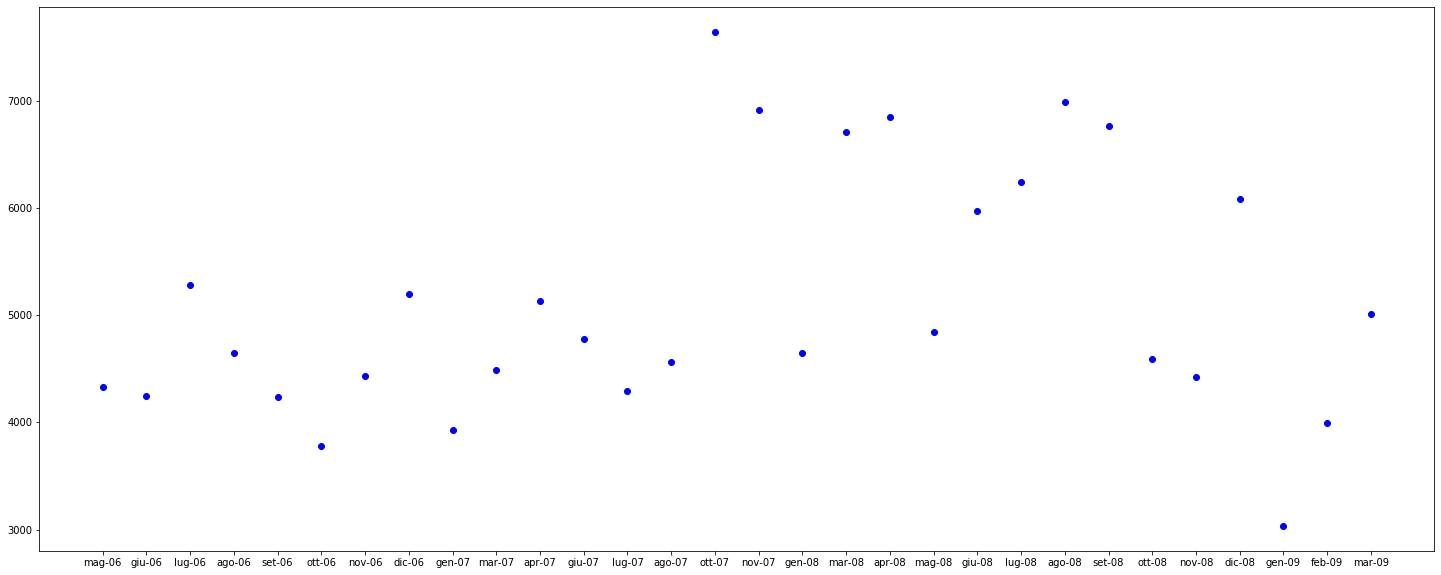

In [7]:
plt.rcParams["figure.figsize"] = (25,10)
plt.plot(C_series_months, C_series_sales, 'bo')
plt.show()

### Performing Linear Regression

In [8]:
C_slope, C_intercept, _, _, _ = scipy.stats.linregress(C_series_months_num, C_series_sales)

print(C_slope, C_intercept)

29.827273077812908 4471.879386134033


### Model Evaluation (Visualization) - Linear

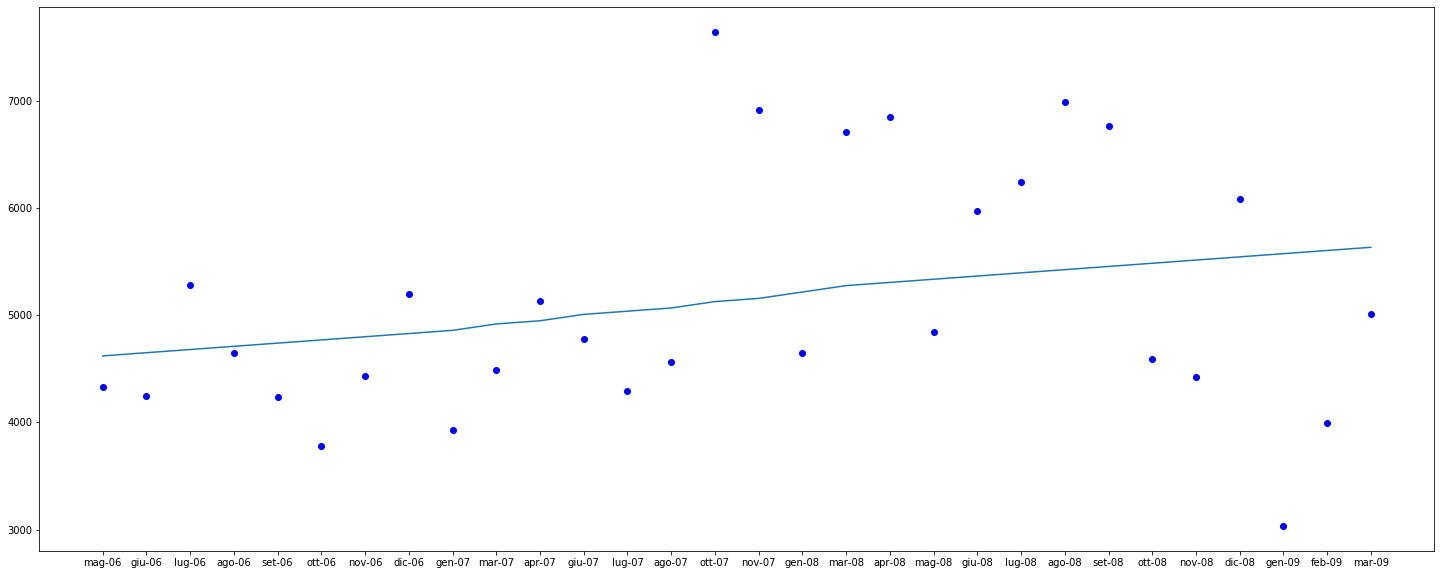

In [70]:
y = []
for val in C_series_months_num:
    y.append((val) * C_slope + C_intercept)
    
plt.plot(C_series_months, y)
plt.plot(C_series_months, C_series_sales, 'bo')
plt.show()

### Non linear fitting

In [99]:
# all 1's as initial estimates
x0 = np.ones(3)

res_robust_C = least_squares(fun, x0, args=(C_series_months_num, C_series_sales))
print(*res_robust_C.x)

-5.131618021121894 255.08915856788292 2591.8088001289248


### Model Evaluation (Visualization) - Non-Linear

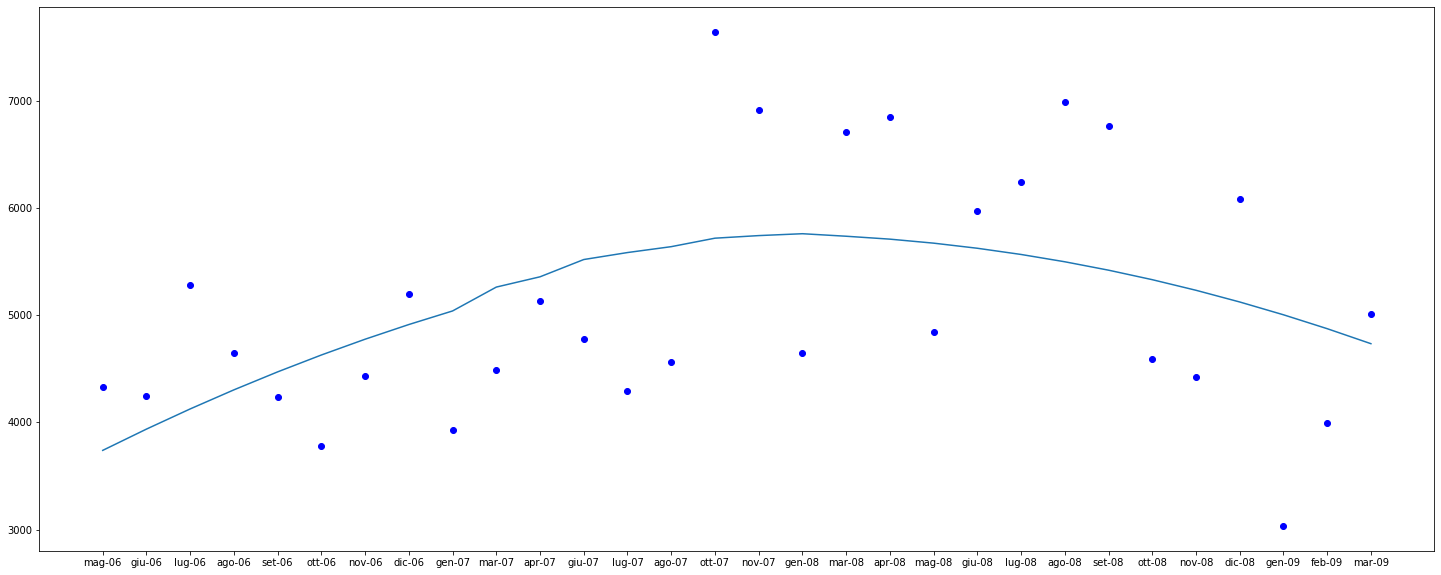

In [100]:
y_C_robust = generate_data(C_series_months_num, *res_robust.x)
plt.plot(C_series_months, y_C_robust)
plt.plot(C_series_months, C_series_sales, 'bo')
plt.show()

# E series 

### Loading the data

In [72]:
E_series_months, E_series_sales = get_sales(sales_data, "E")

print("\n")
print(E_series_months)
print("\n")
print(E_series_sales)

E_series_months_num = []
for val in E_series_months:
    month, year = val.split("-")
    E_series_months_num.append(months[month]+(12*(int(year) - int(base_year))))

print("\n")
print(E_series_months_num)

Invalid data for feb-07. Skipping it...
Invalid data for mag-07. Skipping it...
Invalid data for set-07. Skipping it...
Invalid data for dic-07. Skipping it...
Invalid data for feb-08. Skipping it...


['mag-06', 'giu-06', 'lug-06', 'ago-06', 'set-06', 'ott-06', 'nov-06', 'dic-06', 'gen-07', 'mar-07', 'apr-07', 'giu-07', 'lug-07', 'ago-07', 'ott-07', 'nov-07', 'gen-08', 'mar-08', 'apr-08', 'mag-08', 'giu-08', 'lug-08', 'ago-08', 'set-08', 'ott-08', 'nov-08', 'dic-08', 'gen-09', 'feb-09', 'mar-09']


[4070, 4213, 4479, 3955, 4112, 4895, 4918, 7116, 3375, 4019, 4011, 3686, 3227, 3718, 4176, 4464, 2980, 3039, 3208, 2275, 4360, 4938, 2681, 2968, 2098, 2264, 3464, 1768, 2104, 1978]


[5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 18, 19, 20, 22, 23, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


### Plotting the sales data

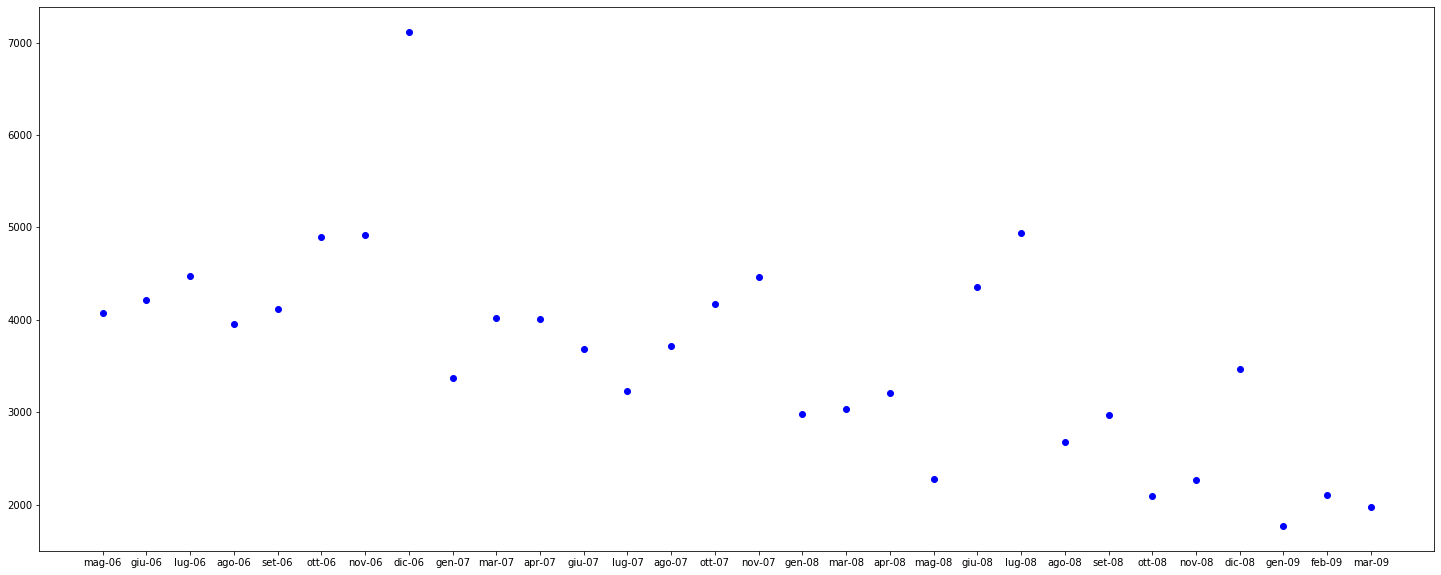

In [73]:
plt.rcParams["figure.figsize"] = (25,10)
plt.plot(E_series_months, E_series_sales, 'bo')
plt.show()

### Performing Linear Regression

In [74]:
E_slope, E_intercept, _, _, _ = scipy.stats.linregress(E_series_months_num, E_series_sales)

print(E_slope, E_intercept)

-69.55880311560114 5167.476016040719


### Model Evaluation (Visualization) - Linear

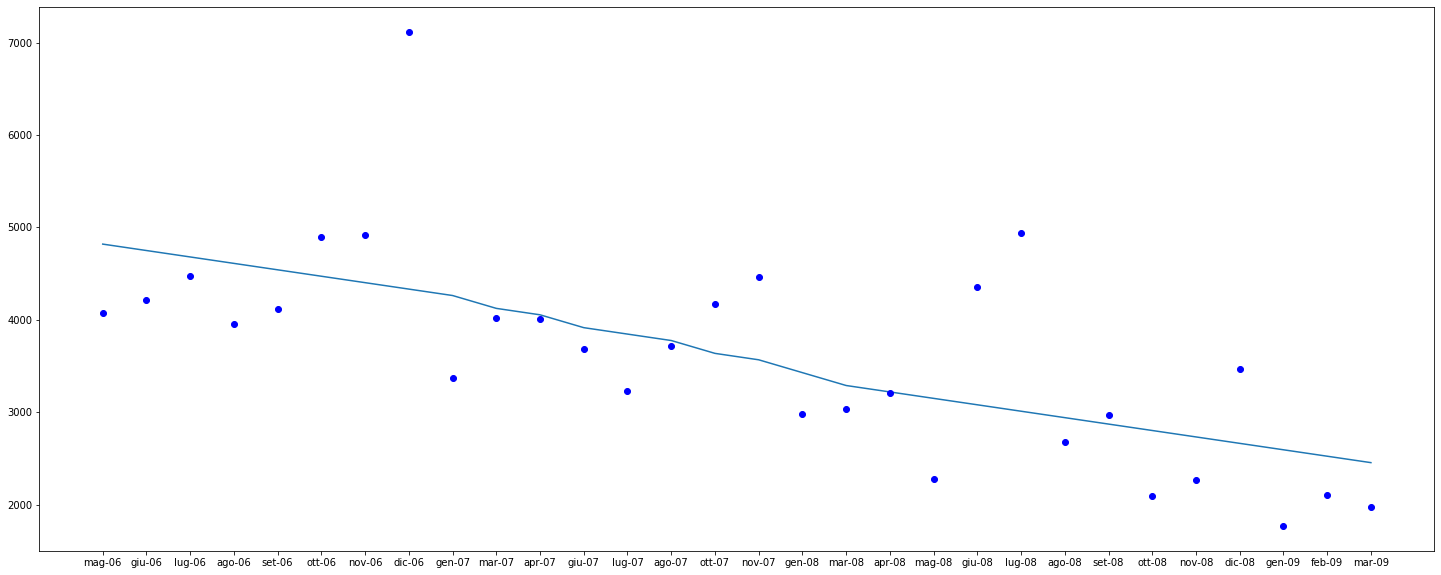

In [75]:
y = []
for val in E_series_months_num:
    y.append((val) * E_slope + E_intercept)
    
plt.plot(E_series_months, y)
plt.plot(E_series_months, E_series_sales, 'bo')
plt.show()

### Non linear fitting

In [108]:
# all 1's as initial estimates
x0 = np.ones(3)

res_robust_E = least_squares(fun, x0, args=(E_series_months_num, E_series_sales))
print(*res_robust_E.x)

-2.2791694716285313 30.48956554389406 4332.456832438366


### Model Evaluation (Visualization) - Non-Linear

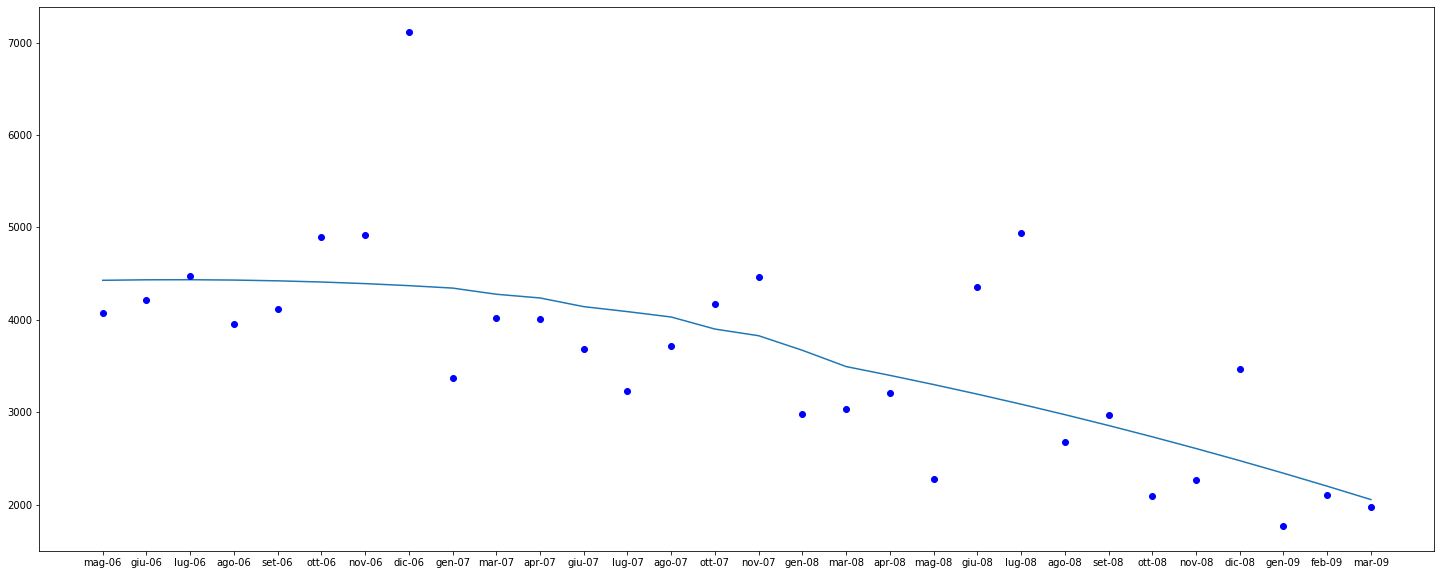

In [109]:
y_E_robust = generate_data(E_series_months_num, *res_robust_E.x)
plt.plot(E_series_months, y_E_robust)
plt.plot(E_series_months, E_series_sales, 'bo')
plt.show()

# S Series

### Loading the data

In [111]:
S_series_months, S_series_sales = get_sales(sales_data, "S")

print("\n")
print(S_series_months)
print("\n")
print(S_series_sales)

S_series_months_num = []
for val in S_series_months:
    month, year = val.split("-")
    S_series_months_num.append(months[month]+(12*(int(year) - int(base_year))))

print("\n")
print(S_series_months_num)


Invalid data for feb-07. Skipping it...
Invalid data for mag-07. Skipping it...
Invalid data for set-07. Skipping it...
Invalid data for dic-07. Skipping it...
Invalid data for feb-08. Skipping it...


['mag-06', 'giu-06', 'lug-06', 'ago-06', 'set-06', 'ott-06', 'nov-06', 'dic-06', 'gen-07', 'mar-07', 'apr-07', 'giu-07', 'lug-07', 'ago-07', 'ott-07', 'nov-07', 'gen-08', 'mar-08', 'apr-08', 'mag-08', 'giu-08', 'lug-08', 'ago-08', 'set-08', 'ott-08', 'nov-08', 'dic-08', 'gen-09', 'feb-09', 'mar-09']


[2526, 2407, 2233, 2427, 2357, 2518, 2780, 2987, 2078, 2440, 2067, 1701, 2521, 2467, 2100, 2106, 1641, 1622, 1775, 1684, 1384, 1577, 1700, 1591, 1208, 997, 1075, 516, 985, 731]


[5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 18, 19, 20, 22, 23, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


### Plotting the sales data

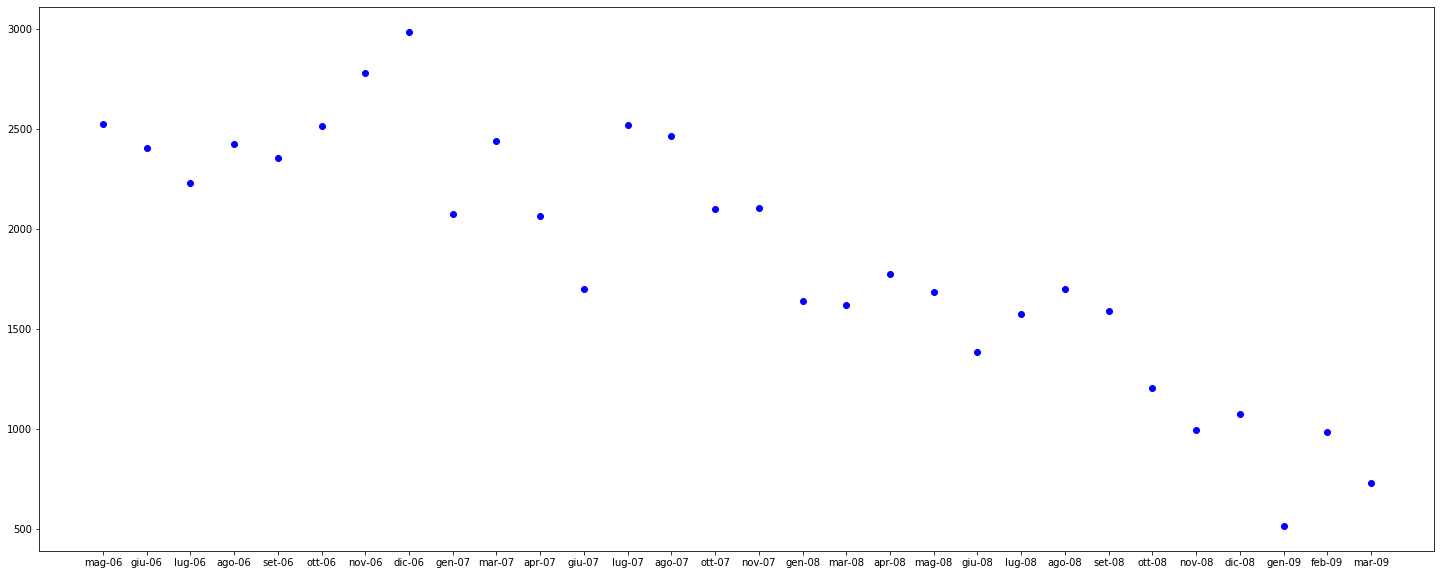

In [112]:
plt.rcParams["figure.figsize"] = (25,10)
plt.plot(S_series_months, S_series_sales, 'bo')
plt.show()

### Performing Linear Regression

In [115]:
S_slope, S_intercept, _, _, _ = scipy.stats.linregress(S_series_months_num, S_series_sales)

print(S_slope, S_intercept)

-51.16707796714737 3012.6869360684814


### Model Evaluation (Visualization) - Linear

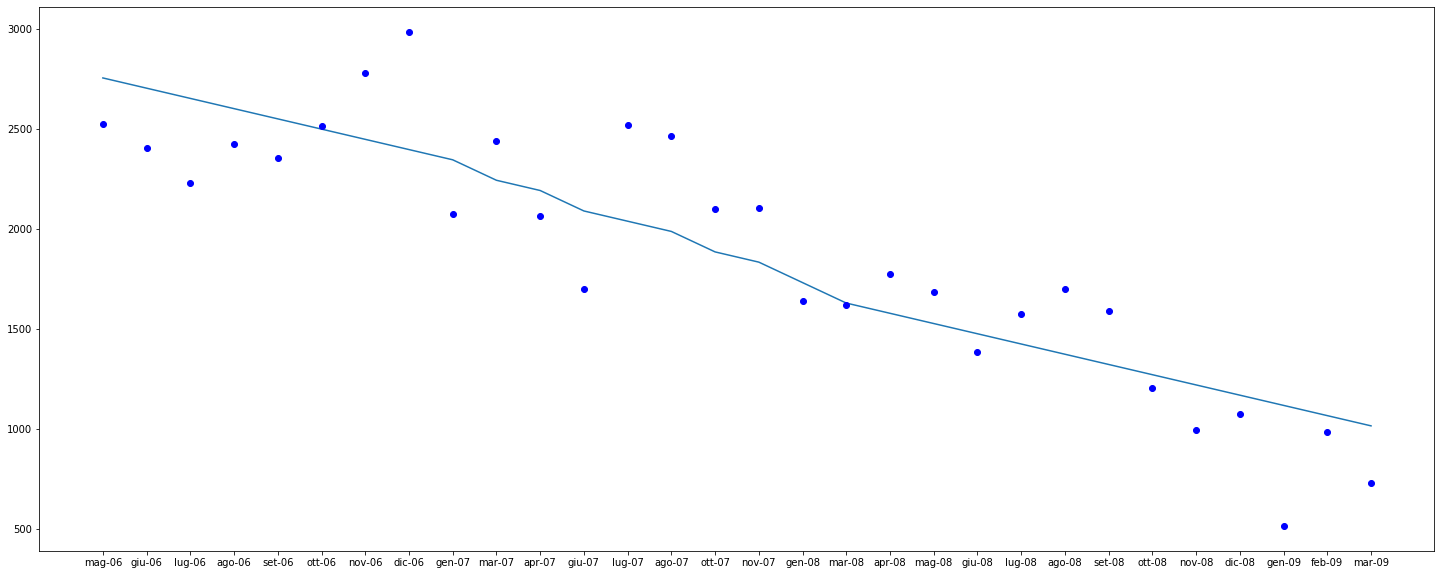

In [116]:
y = []
for val in S_series_months_num:
    y.append((val) * S_slope + S_intercept)
    
plt.plot(S_series_months, y)
plt.plot(S_series_months, S_series_sales, 'bo')
plt.show()

### Non linear fitting

In [117]:
# all 1's as initial estimates
x0 = np.ones(3)

res_robust_S = least_squares(fun, x0, args=(S_series_months_num, S_series_sales))
print(*res_robust_S.x)

-1.764896978685569 26.30634631728646 2366.0817354542805


### Model Evaluation (Visualization) - Non-Linear

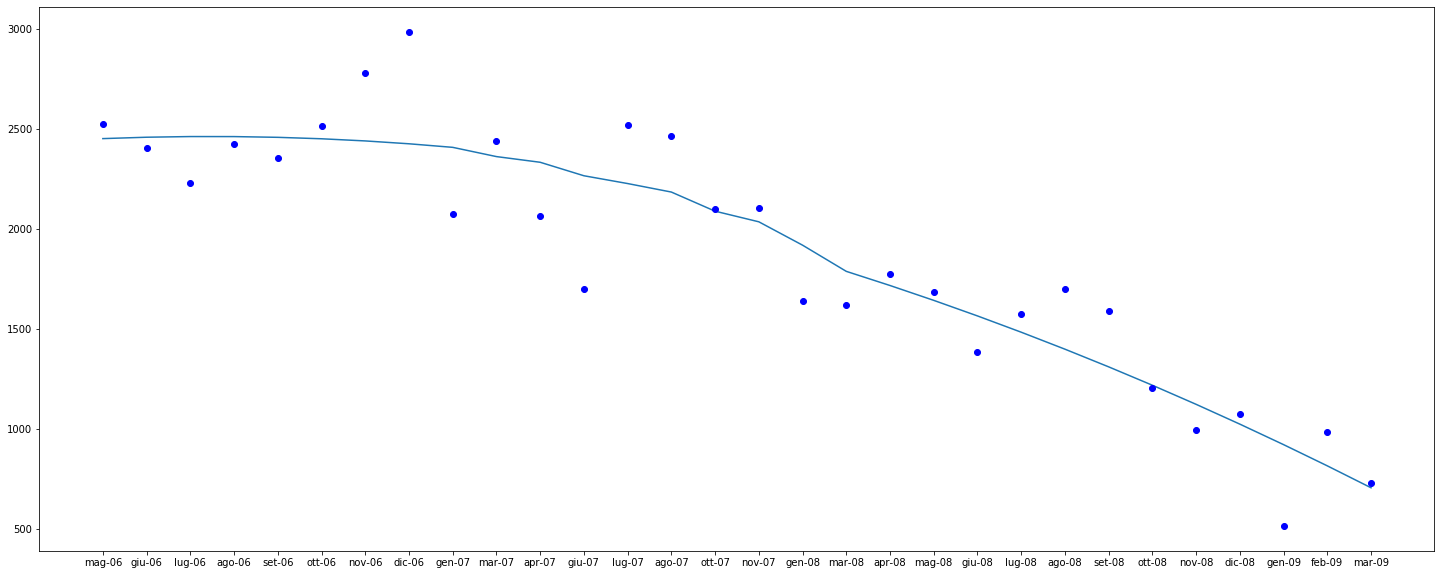

In [118]:
y_S_robust = generate_data(S_series_months_num, *res_robust_S.x)
plt.plot(S_series_months, y_S_robust)
plt.plot(S_series_months, S_series_sales, 'bo')
plt.show()

# CL Series

### Loading the data

In [119]:
cl_series_months, cl_series_sales = get_sales(sales_data, "CL")

print("\n")
print(cl_series_months)
print("\n")
print(cl_series_sales)

cl_series_months_num = []
for val in cl_series_months:
    month, year = val.split("-")
    cl_series_months_num.append(months[month]+(12*(int(year) - int(base_year))))

print("\n")
print(cl_series_months_num)


Invalid data for feb-07. Skipping it...
Invalid data for mag-07. Skipping it...
Invalid data for set-07. Skipping it...
Invalid data for dic-07. Skipping it...
Invalid data for feb-08. Skipping it...


['mag-06', 'giu-06', 'lug-06', 'ago-06', 'set-06', 'ott-06', 'nov-06', 'dic-06', 'gen-07', 'mar-07', 'apr-07', 'giu-07', 'lug-07', 'ago-07', 'ott-07', 'nov-07', 'gen-08', 'mar-08', 'apr-08', 'mag-08', 'giu-08', 'lug-08', 'ago-08', 'set-08', 'ott-08', 'nov-08', 'dic-08', 'gen-09', 'feb-09', 'mar-09']


[46, 63, 52, 54, 41, 98, 391, 347, 258, 295, 330, 266, 344, 352, 318, 329, 253, 297, 275, 250, 180, 220, 232, 221, 223, 187, 147, 100, 232, 68]


[5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 18, 19, 20, 22, 23, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


### Plotting the sales data

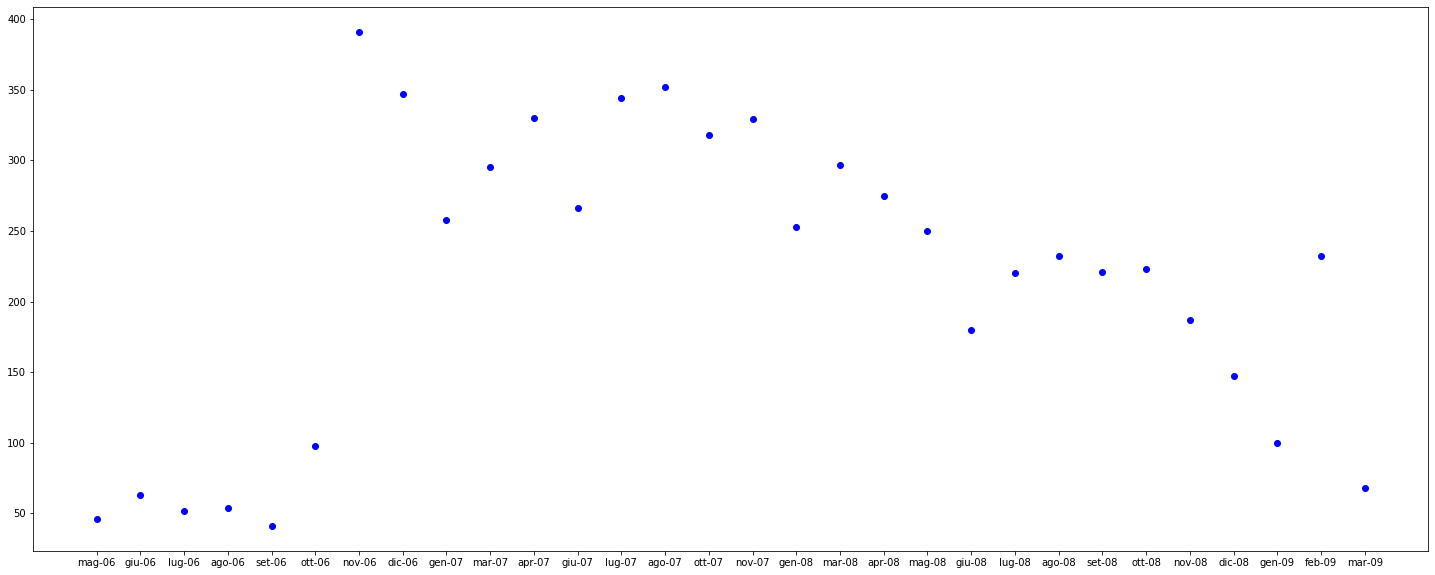

In [120]:
plt.rcParams["figure.figsize"] = (25,10)
plt.plot(cl_series_months, cl_series_sales, 'bo')
plt.show()

### Performing Linear Regression

In [121]:
cl_slope, cl_intercept, _, _, _ = scipy.stats.linregress(cl_series_months_num, cl_series_sales)

print(cl_slope, cl_intercept)

1.1506902136191883 190.0112979100794


### Model Evaluation (Visualization) - Linear

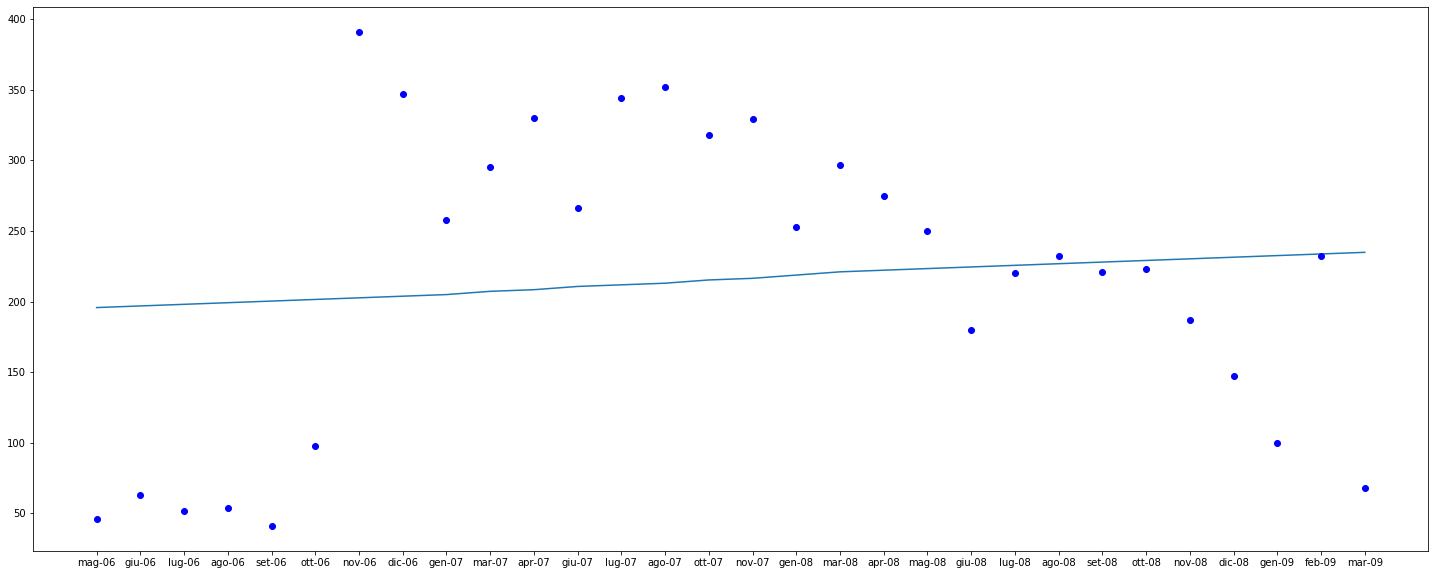

In [122]:
y = []
for val in cl_series_months_num:
    y.append((val) * cl_slope + cl_intercept)
    
plt.plot(cl_series_months, y)
plt.plot(cl_series_months, cl_series_sales, 'bo')
plt.show()

### Non linear fitting

In [123]:
# all 1's as initial estimates
x0 = np.ones(3)

res_robust_cl = least_squares(fun, x0, args=(cl_series_months_num, cl_series_sales))
print(*res_robust_cl.x)

-0.9151939843497724 41.324826519595725 -145.28826646633055


### Model Evaluation (Visualization) - Non-Linear

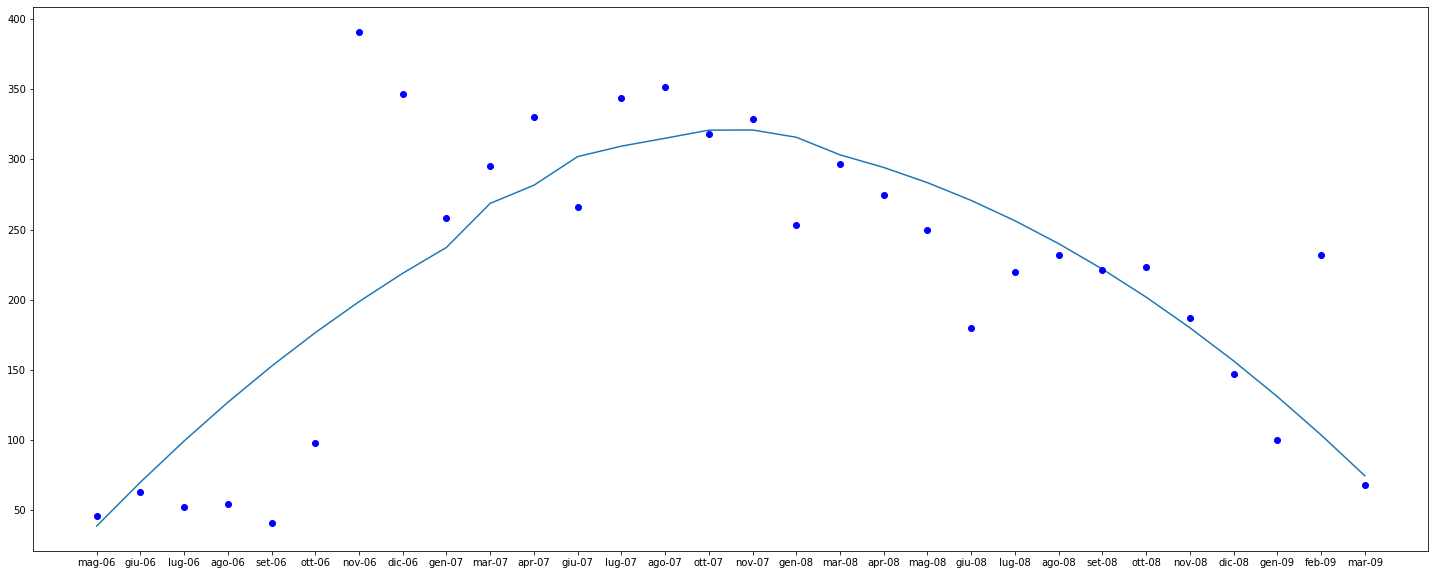

In [124]:
y_cl_robust = generate_data(cl_series_months_num, *res_robust_cl.x)
plt.plot(cl_series_months, y_cl_robust)
plt.plot(cl_series_months, cl_series_sales, 'bo')
plt.show()

# SL Series

### Loading the data

In [125]:
sl_series_months, sl_series_sales = get_sales(sales_data, "SL")

print("\n")
print(sl_series_months)
print("\n")
print(sl_series_sales)

sl_series_months_num = []
for val in sl_series_months:
    month, year = val.split("-")
    sl_series_months_num.append(months[month]+(12*(int(year) - int(base_year))))

print("\n")
print(sl_series_months_num)


Invalid data for feb-07. Skipping it...
Invalid data for mag-07. Skipping it...
Invalid data for set-07. Skipping it...
Invalid data for dic-07. Skipping it...
Invalid data for feb-08. Skipping it...


['mag-06', 'giu-06', 'lug-06', 'ago-06', 'set-06', 'ott-06', 'nov-06', 'dic-06', 'gen-07', 'mar-07', 'apr-07', 'giu-07', 'lug-07', 'ago-07', 'ott-07', 'nov-07', 'gen-08', 'mar-08', 'apr-08', 'mag-08', 'giu-08', 'lug-08', 'ago-08', 'set-08', 'ott-08', 'nov-08', 'dic-08', 'gen-09', 'feb-09', 'mar-09']


[1056, 866, 768, 713, 557, 554, 456, 539, 369, 670, 703, 594, 551, 485, 319, 488, 389, 379, 518, 1083, 667, 501, 477, 357, 276, 189, 263, 133, 462, 308]


[5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 18, 19, 20, 22, 23, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


### Plotting the sales data

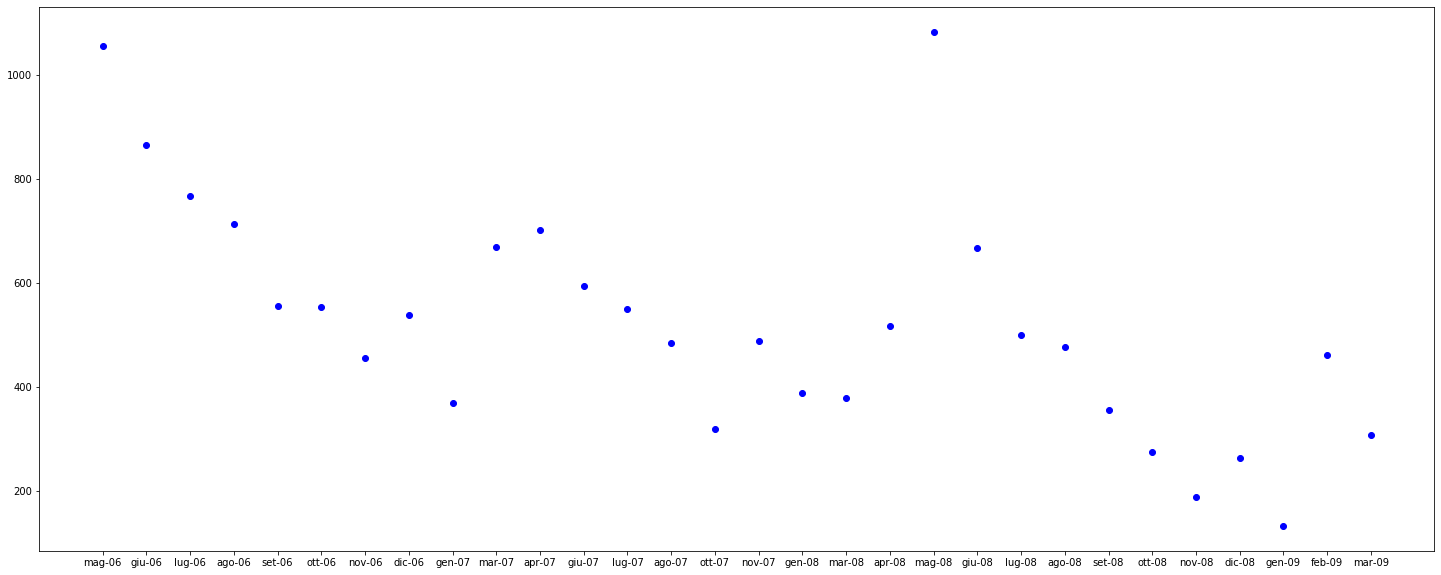

In [126]:
plt.rcParams["figure.figsize"] = (25,10)
plt.plot(sl_series_months, sl_series_sales, 'bo')
plt.show()

### Performing Linear Regression

In [127]:
sl_slope, sl_intercept, _, _, _ = scipy.stats.linregress(sl_series_months_num, sl_series_sales)

print(sl_slope, sl_intercept)

-12.193067016272078 794.4989588956582


### Model Evaluation (Visualization) - Linear

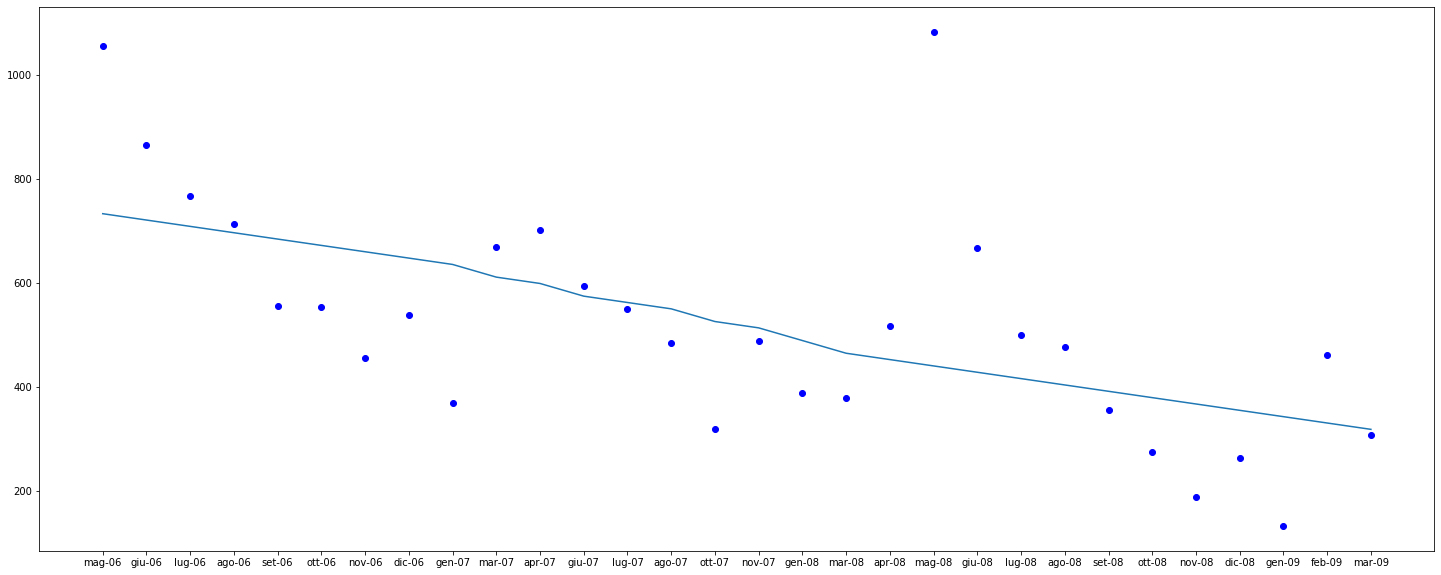

In [128]:
y = []
for val in sl_series_months_num:
    y.append((val) * sl_slope + sl_intercept)
    
plt.plot(sl_series_months, y)
plt.plot(sl_series_months, sl_series_sales, 'bo')
plt.show()

### Non linear fitting

In [129]:
# all 1's as initial estimates
x0 = np.ones(3)

res_robust_sl = least_squares(fun, x0, args=(sl_series_months_num, sl_series_sales))
print(*res_robust_sl.x)

0.1304633399536082 -17.919997188150322 842.2968059915033


### Model Evaluation (Visualization) - Non-Linear

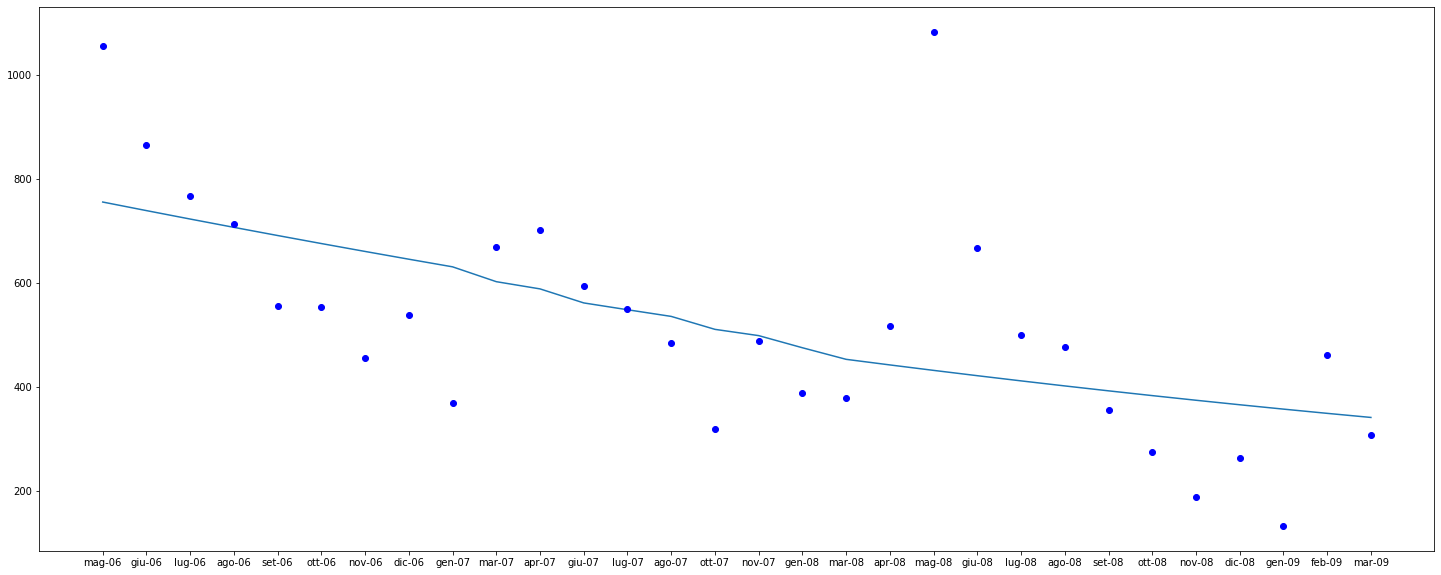

In [130]:
y_sl_robust = generate_data(sl_series_months_num, *res_robust_sl.x)
plt.plot(sl_series_months, y_sl_robust)
plt.plot(sl_series_months, sl_series_sales, 'bo')
plt.show()

# M Series

### Loading the data

In [131]:
m_series_months, m_series_sales = get_sales(sales_data, "M")

print("\n")
print(m_series_months)
print("\n")
print(m_series_sales)

m_series_months_num = []
for val in m_series_months:
    month, year = val.split("-")
    m_series_months_num.append(months[month]+(12*(int(year) - int(base_year))))

print("\n")
print(m_series_months_num)


Invalid data for feb-07. Skipping it...
Invalid data for mag-07. Skipping it...
Invalid data for set-07. Skipping it...
Invalid data for dic-07. Skipping it...
Invalid data for feb-08. Skipping it...


['mag-06', 'giu-06', 'lug-06', 'ago-06', 'set-06', 'ott-06', 'nov-06', 'dic-06', 'gen-07', 'mar-07', 'apr-07', 'giu-07', 'lug-07', 'ago-07', 'ott-07', 'nov-07', 'gen-08', 'mar-08', 'apr-08', 'mag-08', 'giu-08', 'lug-08', 'ago-08', 'set-08', 'ott-08', 'nov-08', 'dic-08', 'gen-09', 'feb-09', 'mar-09']


[2278, 2601, 2446, 2312, 2706, 2770, 3183, 3889, 2351, 2619, 2382, 2551, 3015, 3062, 2942, 3015, 3237, 3189, 2582, 2706, 2601, 2691, 2430, 2981, 3150, 2911, 2761, 1355, 1353, 1675]


[5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 18, 19, 20, 22, 23, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


### Plotting the sales data

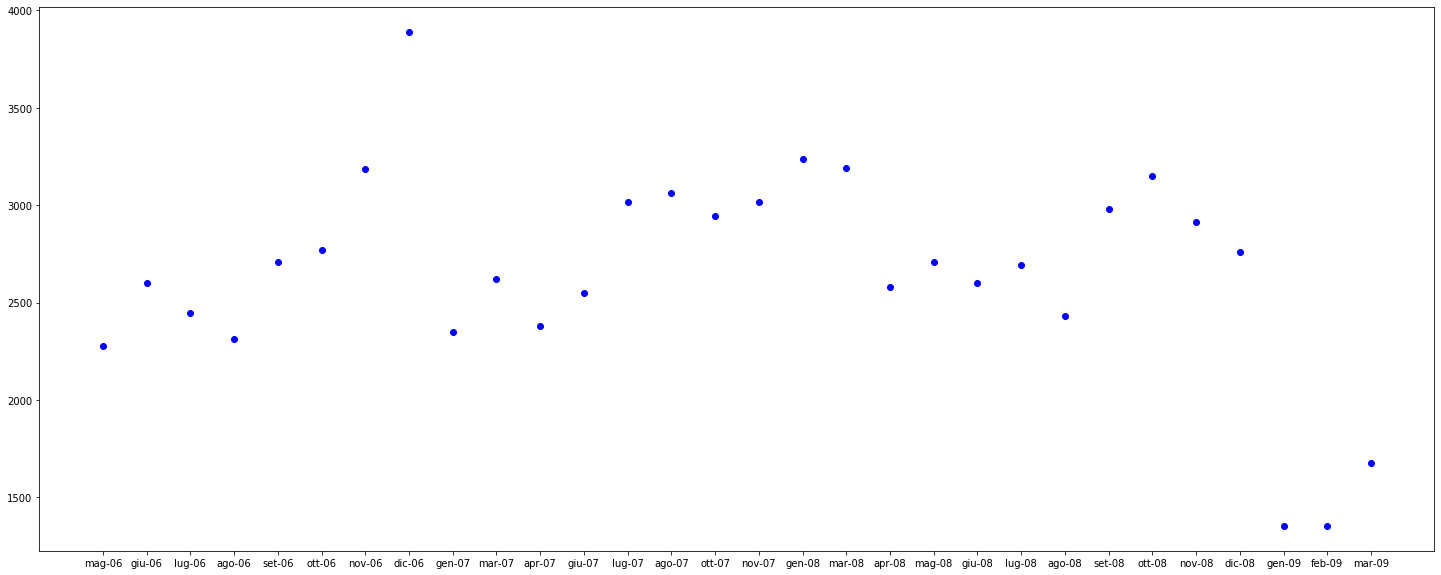

In [132]:
plt.rcParams["figure.figsize"] = (25,10)
plt.plot(m_series_months, m_series_sales, 'bo')
plt.show()

### Performing Linear Regression

In [133]:
m_slope, m_intercept, _, _, _ = scipy.stats.linregress(m_series_months_num, m_series_sales)

print(m_slope, m_intercept)

-12.196845839438573 2929.716434024832


### Model Evaluation (Visualization) - Linear

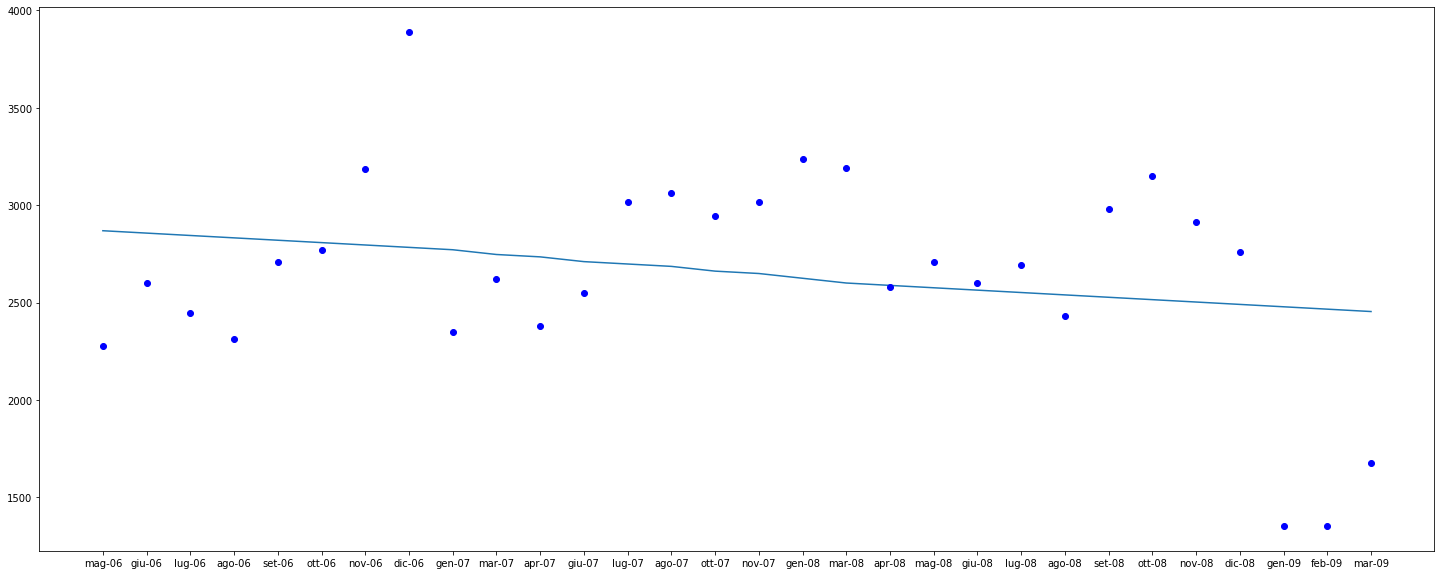

In [134]:
y = []
for val in m_series_months_num:
    y.append((val) * m_slope + m_intercept)
    
plt.plot(m_series_months, y)
plt.plot(m_series_months, m_series_sales, 'bo')
plt.show()

### Non linear fitting

In [135]:
# all 1's as initial estimates
x0 = np.ones(3)

res_robust_m = least_squares(fun, x0, args=(m_series_months_num, m_series_sales))
print(*res_robust_m.x)

-3.236548962934496 129.87746996108652 1743.9421884836463


### Model Evaluation (Visualization) - Non-Linear

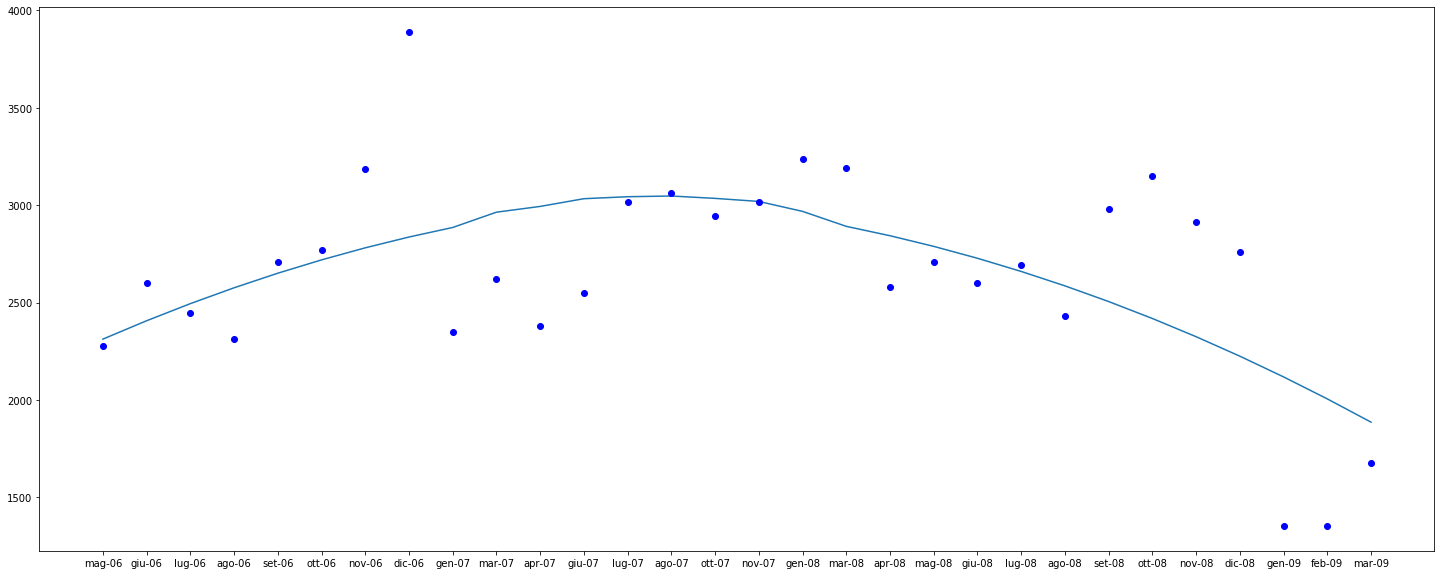

In [136]:
y_m_robust = generate_data(m_series_months_num, *res_robust_m.x)
plt.plot(m_series_months, y_m_robust)
plt.plot(m_series_months, m_series_sales, 'bo')
plt.show()

# Collective sales

### Get data

In [140]:
all_series_months, all_series_sales = get_data_all_cars_month(sales_data)

print("\n")
print(all_series_months)
print("\n")
print(all_series_sales)

all_series_months_num = []
for val in all_series_months:
    month, year = val.split("-")
    all_series_months_num.append(months[month]+(12*(int(year) - int(base_year))))

print("\n")
print(all_series_months_num)

Invalid data for feb-07. Skipping it...
Invalid data for mag-07. Skipping it...
Invalid data for set-07. Skipping it...
Invalid data for dic-07. Skipping it...
Invalid data for feb-08. Skipping it...


['mag-06', 'giu-06', 'lug-06', 'ago-06', 'set-06', 'ott-06', 'nov-06', 'dic-06', 'gen-07', 'mar-07', 'apr-07', 'giu-07', 'lug-07', 'ago-07', 'ott-07', 'nov-07', 'gen-08', 'mar-08', 'apr-08', 'mag-08', 'giu-08', 'lug-08', 'ago-08', 'set-08', 'ott-08', 'nov-08', 'dic-08', 'gen-09', 'feb-09', 'mar-09']


[14305, 14400, 15263, 14113, 14011, 14619, 16163, 20075, 12359, 14529, 14624, 13574, 13949, 14649, 17501, 17322, 13147, 15239, 15208, 12840, 15169, 16168, 14510, 14890, 11549, 10970, 13800, 6904, 9126, 9768]


[5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 18, 19, 20, 22, 23, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


### Plotting the data

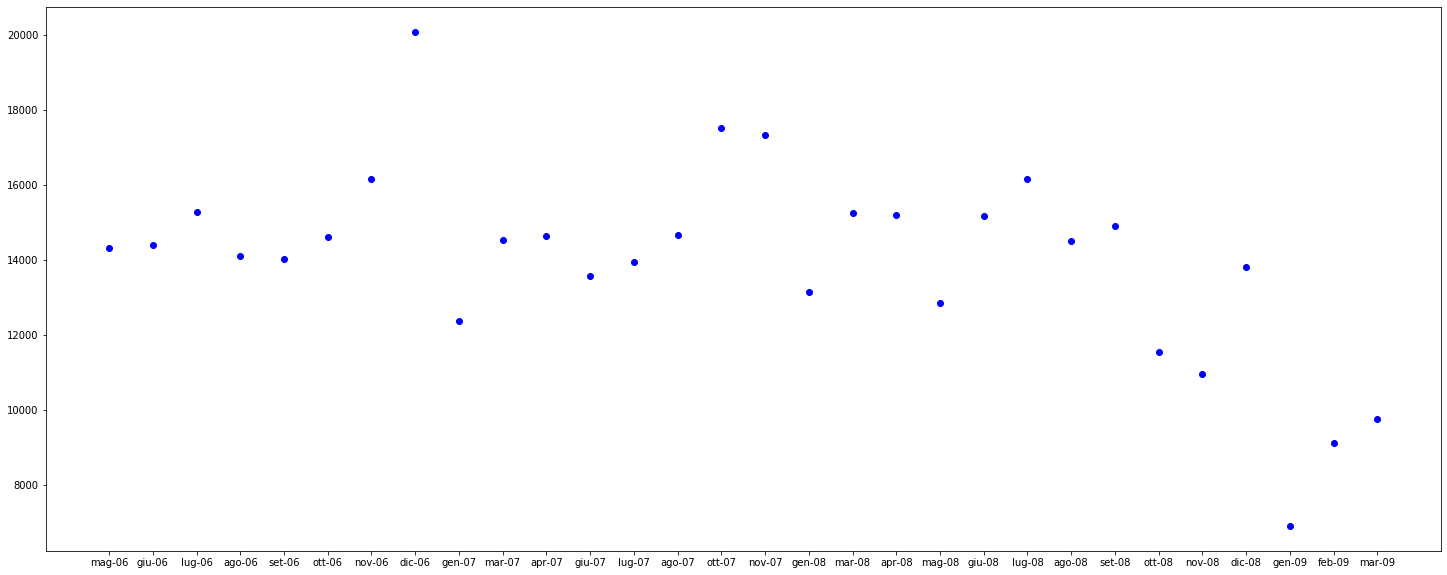

In [141]:
plt.rcParams["figure.figsize"] = (25,10)
plt.plot(all_series_months, all_series_sales, 'bo')
plt.show()

### Performing Linear Regression

In [142]:
all_slope, all_intercept, _, _, _ = scipy.stats.linregress(all_series_months_num, all_series_sales)

print(all_slope, all_intercept)

-114.13783064702706 16566.269029073803


### Model Evaluation (Visualization) - Linear

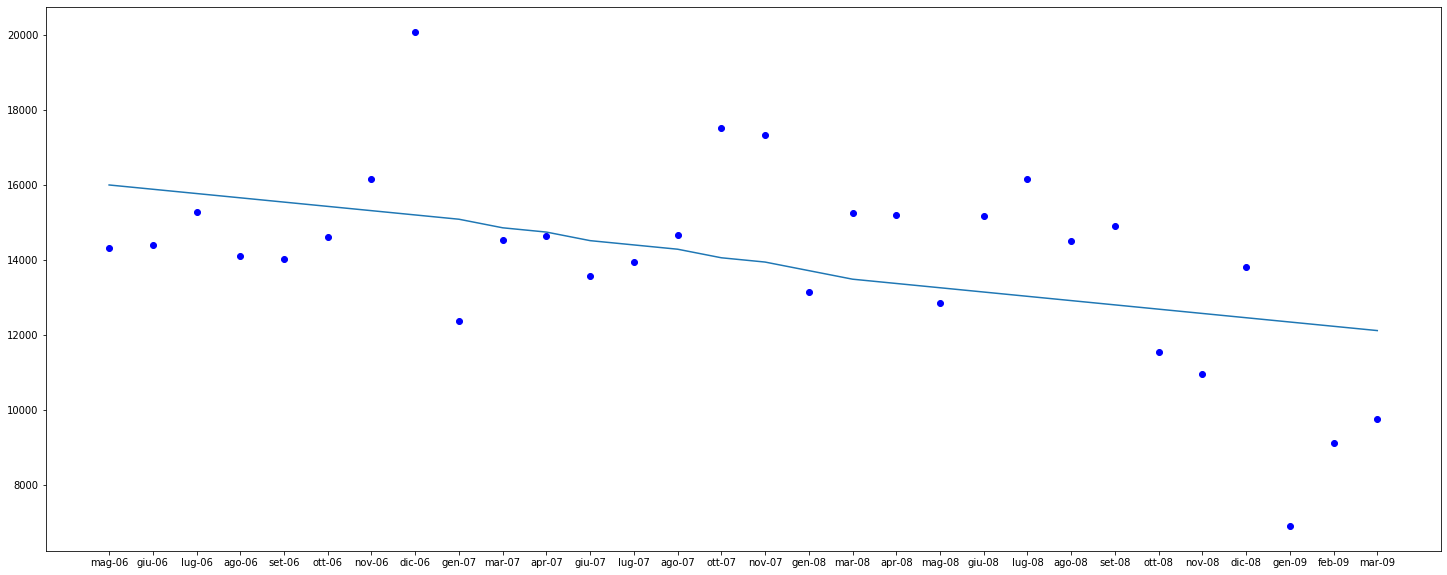

In [143]:
y = []
for val in all_series_months_num:
    y.append((val) * all_slope + all_intercept)
    
plt.plot(all_series_months, y)
plt.plot(all_series_months, all_series_sales, 'bo')
plt.show()

### Non linear fitting

In [144]:
# all 1's as initial estimates
x0 = np.ones(3)

res_robust_all = least_squares(fun, x0, args=(all_series_months_num, all_series_sales))
print(*res_robust_all.x)

-13.196964146563467 465.1673715561249 11731.298086941333


### Model Evaluation (Visualization) - Non-Linear

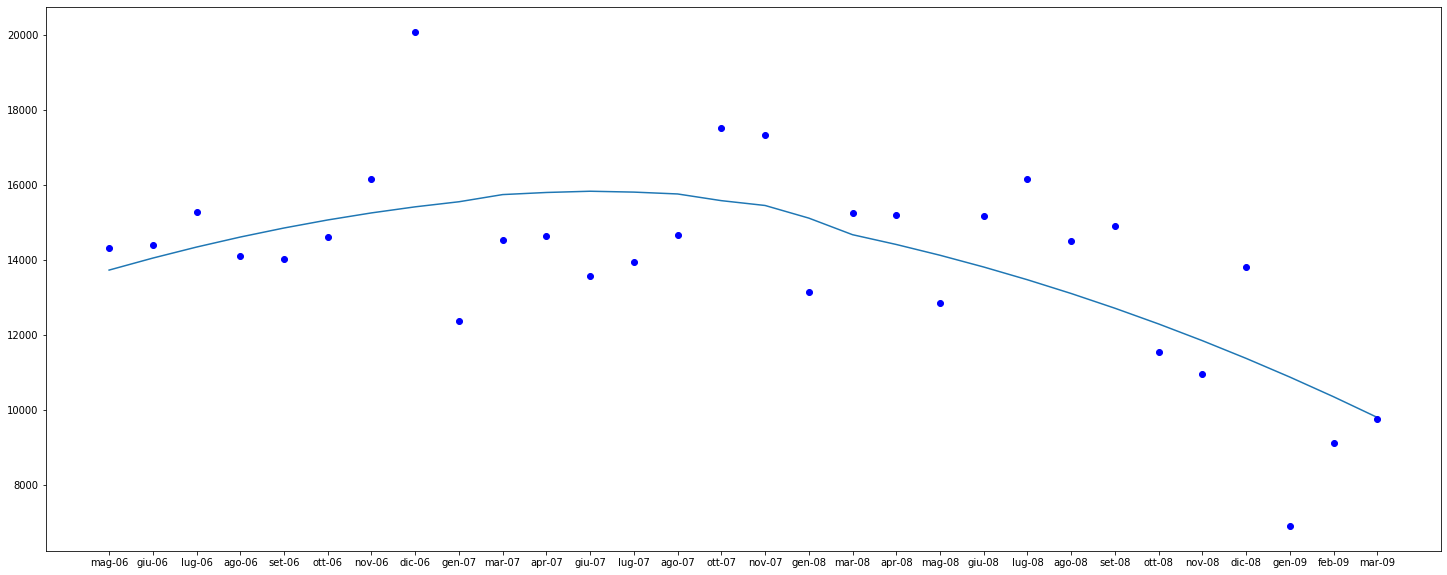

In [145]:
y_all_robust = generate_data(all_series_months_num, *res_robust_all.x)
plt.plot(all_series_months, y_all_robust)
plt.plot(all_series_months, all_series_sales, 'bo')
plt.show()